In [1]:
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
resultados = pd.read_csv("ResultadosElectorales_2023.csv")
circuitos = gpd.read_file("circuitos-electorales.csv")

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_10124\290196362.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  resultados = pd.read_csv("ResultadosElectorales_2023.csv")


In [3]:
#Vamos a crear un filtro con datos de Caba y Presidente.
filtro = resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires") & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE")].reset_index()

#Guardamos en otro DF los votos de cada agrupacion en CABA y agregamos los porcentajes de votos
total = filtro["votos_cantidad"].sum()
dfPartidosTotales = filtro.groupby(["agrupacion_nombre","distrito_nombre"]
    ).agg(porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))
    ).reset_index()

votos_Blanco = filtro[filtro["votos_tipo"] == "EN BLANCO"]
porcentaje_en_blanco = round((votos_Blanco["votos_cantidad"].sum() * 100) / total, 2)

fila_en_blanco = {"agrupacion_nombre": "EN BLANCO", "distrito_nombre": "Ciudad Autónoma de Buenos Aires", "porcentaje": porcentaje_en_blanco}
df_en_blanco = pd.DataFrame([fila_en_blanco])

dfPartidos = pd.concat([dfPartidosTotales, df_en_blanco], ignore_index=True)
dfPartidos






,agrupacion_nombre,distrito_nombre,porcentaje
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,Ciudad Autónoma de Buenos Aires,3.46
1,HACEMOS POR NUESTRO PAIS,Ciudad Autónoma de Buenos Aires,3.01
2,JUNTOS POR EL CAMBIO,Ciudad Autónoma de Buenos Aires,40.15
3,LA LIBERTAD AVANZA,Ciudad Autónoma de Buenos Aires,19.33
4,UNION POR LA PATRIA,Ciudad Autónoma de Buenos Aires,31.43
5,EN BLANCO,Ciudad Autónoma de Buenos Aires,1.69


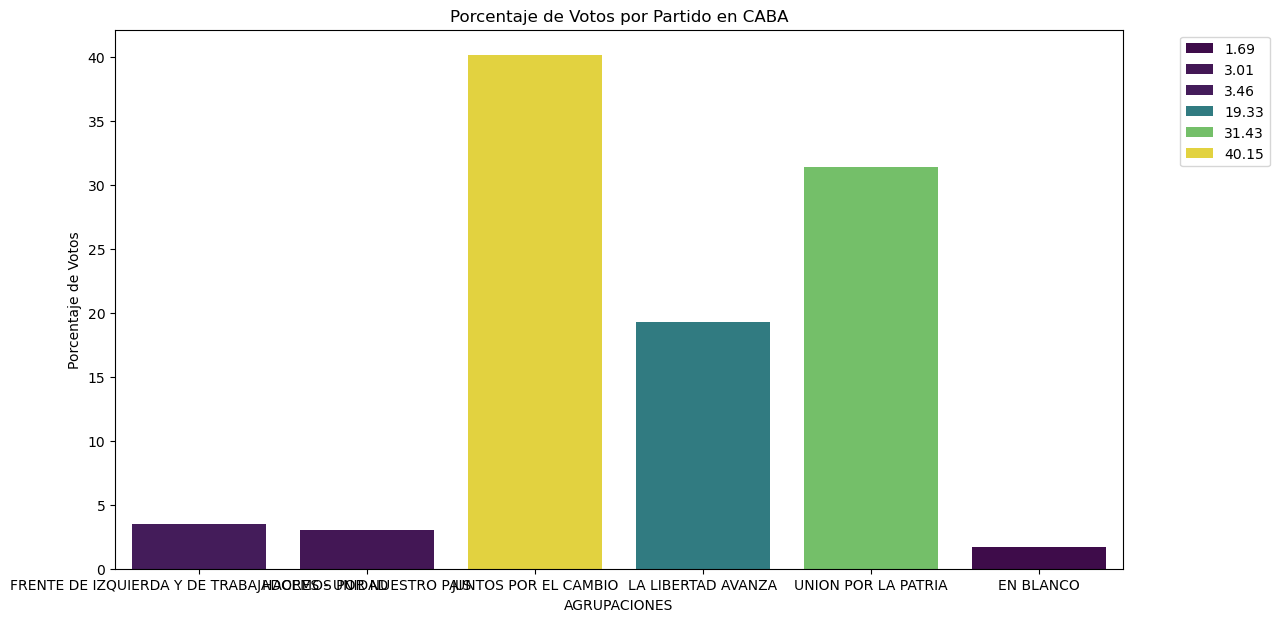

In [4]:
plt.figure(figsize=(13, 7))
sns.barplot(x='agrupacion_nombre', y='porcentaje',data= dfPartidos, hue='porcentaje', palette="viridis")

# reever los nombres, le puse el que me parecio y los valores los saque standar 
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('AGRUPACIONES')
plt.ylabel('Porcentaje de Votos')
plt.title('Porcentaje de Votos por Partido en CABA')

plt.show()

In [5]:
filtroUxP= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "UNION POR LA PATRIA")]

filtroUxP.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()


,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,UNION POR LA PATRIA,38645,2.02
1,Comuna 02,UNION POR LA PATRIA,19225,1.01
2,Comuna 03,UNION POR LA PATRIA,38993,2.04
3,Comuna 04,UNION POR LA PATRIA,51401,2.69
4,Comuna 05,UNION POR LA PATRIA,42504,2.22
5,Comuna 06,UNION POR LA PATRIA,39230,2.05
6,Comuna 07,UNION POR LA PATRIA,44622,2.33
7,Comuna 08,UNION POR LA PATRIA,43136,2.26
8,Comuna 09,UNION POR LA PATRIA,39233,2.05
9,Comuna 10,UNION POR LA PATRIA,37457,1.96


In [6]:
circuitos

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,001,1,1,SAN TELMO,11377.00000000000,5695.00000000000,5682.00000000000,4157.17556283000,709721.55022900004,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606..."
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,002,2,1,SAN TELMO,11365.00000000000,5870.00000000000,5495.00000000000,3045.85873489000,523430.86001399998,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743..."
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,003,3,1,PUERTO MADERO,702.00000000000,416.00000000000,286.00000000000,14439.58562320000,4248032.90197000000,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723..."
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,004,4,1,PUERTO MADERO,489.00000000000,307.00000000000,182.00000000000,8028.11547007000,777372.45509700000,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762..."
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,005,5,1,RETIRO,5275.00000000000,3131.00000000000,2144.00000000000,16401.98147680000,3262096.05041000010,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328..."
...,...,...,...,...,...,...,...,...,...,...,...
162,MULTIPOLYGON (((-58.4133289404238 -34.64349004...,057,57,4,NUEVA POMPEYA,18768.00000000000,9532.00000000000,9236.00000000000,6341.98611558000,1681075.20221000000,"MULTIPOLYGON (((-58.41333 -34.64349, -58.41254..."
163,MULTIPOLYGON (((-58.4752520574717 -34.66896222...,089,89,8,VILLA LUGANO,46140.00000000000,23699.00000000000,22441.00000000000,10058.06223910000,4524565.79088000020,"MULTIPOLYGON (((-58.47525 -34.66896, -58.47441..."
164,MULTIPOLYGON (((-58.464421436223 -34.660057142...,090,90,8,VILLA LUGANO,42538.00000000000,21474.00000000000,21064.00000000000,10870.01898480000,4771793.77496999970,"MULTIPOLYGON (((-58.46442 -34.66006, -58.46448..."
165,MULTIPOLYGON (((-58.4713146924268 -34.63664464...,112,112,10,FLORESTA,8290.00000000000,3945.00000000000,4345.00000000000,3067.80447799000,542171.08825499995,"MULTIPOLYGON (((-58.47131 -34.63664, -58.47131..."


In [7]:
circuitos.columns

Index(['WKT', 'ID', 'CIRCUITO_N', 'COMUNA', 'BARRIO', 'TOTAL', 'MASCULINO',
       'FEMENINO', 'PERIMETRO', 'AREA', 'geometry'],
      dtype='object')

In [8]:
datosC = circuitos.dtypes
print(datosC)

WKT             object
ID              object
CIRCUITO_N      object
COMUNA          object
BARRIO          object
TOTAL           object
MASCULINO       object
FEMENINO        object
PERIMETRO       object
AREA            object
geometry      geometry
dtype: object


In [9]:
filtro.columns

Index(['index', 'año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo',
       'distrito_id', 'distrito_nombre', 'seccionprovincial_id',
       'seccionprovincial_nombre', 'seccion_id', 'seccion_nombre',
       'circuito_id', 'circuito_nombre', 'mesa_id', 'mesa_tipo',
       'mesa_electores', 'cargo_id', 'cargo_nombre', 'agrupacion_id',
       'agrupacion_nombre', 'lista_numero', 'lista_nombre', 'votos_tipo',
       'votos_cantidad'],
      dtype='object')

In [10]:


# Agregar una columna 'Comuna' al DataFrame filtro
filtro["Comuna"] = filtro["distrito_nombre"].str.extract(r'(\d+)')
# Verificar si hay valores nulos en la columna "Comuna" y rellenarlos con un valor por defecto (por ejemplo, -1)
filtro["Comuna"] = filtro["Comuna"].fillna("-1")
# Convertir la columna "Comuna" a un tipo de dato entero
filtro["Comuna"] = filtro["Comuna"].astype(int)


filtro["porcentaje"] = (filtro["votos_cantidad"] / filtro["votos_cantidad"].sum()) * 100

# Obtener la agrupación ganadora en cada comuna
ganadores_comuna = filtro.groupby("Comuna")["porcentaje"].idxmax()

# Crear un DataFrame con la información de la agrupación ganadora y el total de votos por comuna
dfGanadoresComuna = filtro.loc[ganadores_comuna, ["Comuna", "seccion_nombre", "agrupacion_nombre", "porcentaje"]]
dfGanadoresComuna["Total_Votos"] = filtro.groupby("Comuna")["votos_cantidad"].sum().values

# Renombrar la columna "Comuna" a "Seccion_Nombre" para reflejar el nombre real de la comuna
dfGanadoresComuna = dfGanadoresComuna.rename(columns={"Comuna": "Seccion_Nombre"})

# Mostrar el DataFrame resultante
print(dfGanadoresComuna)


      Seccion_Nombre seccion_nombre     agrupacion_nombre  porcentaje  \
1462              -1      Comuna 01  JUNTOS POR EL CAMBIO    0.010359   

      Total_Votos  
1462      1911431  


In [11]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado "filtro" con la información de votación

# Agregar una columna 'Comuna' al DataFrame filtro
filtro["Comuna"] = filtro["seccion_nombre"].str.extract(r'(\d+)')

# Convertir la columna "Comuna" a un tipo de dato entero
filtro["Comuna"] = pd.to_numeric(filtro["Comuna"], errors="coerce").fillna(-1).astype(int)

# Crear la columna "porcentaje" para evitar problemas al calcular el máximo por comuna
filtro["porcentaje"] = (filtro["votos_cantidad"] / filtro["votos_cantidad"].sum()) * 100

# Obtener la agrupación ganadora en cada comuna
ganadores_comuna = filtro.groupby("Comuna")["porcentaje"].idxmax()

# Crear un DataFrame con la información de la agrupación ganadora y el total de votos por comuna
dfGanadoresComuna = filtro.loc[ganadores_comuna, ["Comuna", "seccion_nombre", "agrupacion_nombre", "porcentaje"]]
dfGanadoresComuna["Total_Votos"] = filtro.groupby("Comuna")["votos_cantidad"].sum().values

# Renombrar la columna "Comuna" a "Seccion_Nombre" para reflejar el nombre real de la comuna
dfGanadoresComuna = dfGanadoresComuna.rename(columns={"Comuna": "Seccion_Nombre"})

# Mostrar el DataFrame resultante
print(dfGanadoresComuna)


       Seccion_Nombre seccion_nombre     agrupacion_nombre  porcentaje  \
1462                1      Comuna 01  JUNTOS POR EL CAMBIO    0.010359   
9187                2      Comuna 02  JUNTOS POR EL CAMBIO    0.010202   
12783               3      Comuna 03   UNION POR LA PATRIA    0.006540   
16195               4      Comuna 04  JUNTOS POR EL CAMBIO    0.008789   
20001               5      Comuna 05  JUNTOS POR EL CAMBIO    0.007063   
23774               6      Comuna 06  JUNTOS POR EL CAMBIO    0.008161   
31087               7      Comuna 07  JUNTOS POR EL CAMBIO    0.008371   
34594               8      Comuna 08   UNION POR LA PATRIA    0.008004   
37362               9      Comuna 09  JUNTOS POR EL CAMBIO    0.007952   
41107              10      Comuna 10  JUNTOS POR EL CAMBIO    0.006697   
49497              11      Comuna 11  JUNTOS POR EL CAMBIO    0.009051   
52184              12      Comuna 12  JUNTOS POR EL CAMBIO    0.008475   
59182              13      Comuna 13  

In [12]:

filtro["Comuna"] = filtro["seccion_nombre"].str.extract(r'(\d+)')

# Convertir la columna "Comuna" a un tipo de dato entero
filtro["Comuna"] = pd.to_numeric(filtro["Comuna"], errors="coerce").fillna(-1).astype(int)

# Agregar el número de comuna a la columna "seccion_nombre"
filtro["seccion_nombre"] = filtro["seccion_nombre"] + " (Comuna " + filtro["Comuna"].astype(str) + ")"

# Crear la columna "porcentaje" calculando el porcentaje de votos respecto al total de votos en cada comuna
filtro["porcentaje"] = (filtro["votos_cantidad"] / filtro.groupby("Comuna")["votos_cantidad"].transform("sum")) * 100

# Obtener la agrupación ganadora en cada comuna
ganadores_comuna = filtro.groupby("Comuna")["porcentaje"].idxmax()

# Crear un DataFrame con la información de la agrupación ganadora y el total de votos por comuna
dfGanadoresComuna = filtro.loc[ganadores_comuna, ["Comuna", "seccion_nombre", "agrupacion_nombre", "porcentaje"]]
dfGanadoresComuna["Total_Votos"] = filtro.groupby("Comuna")["votos_cantidad"].sum().values

# Renombrar la columna "Comuna" a "Seccion_Nombre" para reflejar el nombre real de la comuna
dfGanadoresComuna = dfGanadoresComuna.rename(columns={"Comuna": "Seccion_Nombre"})

# Mostrar el DataFrame resultante
print(dfGanadoresComuna)


       Seccion_Nombre         seccion_nombre     agrupacion_nombre  \
1462                1   Comuna 01 (Comuna 1)  JUNTOS POR EL CAMBIO   
9187                2   Comuna 02 (Comuna 2)  JUNTOS POR EL CAMBIO   
12783               3   Comuna 03 (Comuna 3)   UNION POR LA PATRIA   
16195               4   Comuna 04 (Comuna 4)  JUNTOS POR EL CAMBIO   
20001               5   Comuna 05 (Comuna 5)  JUNTOS POR EL CAMBIO   
23774               6   Comuna 06 (Comuna 6)  JUNTOS POR EL CAMBIO   
31087               7   Comuna 07 (Comuna 7)  JUNTOS POR EL CAMBIO   
34594               8   Comuna 08 (Comuna 8)   UNION POR LA PATRIA   
37362               9   Comuna 09 (Comuna 9)  JUNTOS POR EL CAMBIO   
41107              10  Comuna 10 (Comuna 10)  JUNTOS POR EL CAMBIO   
49497              11  Comuna 11 (Comuna 11)  JUNTOS POR EL CAMBIO   
52184              12  Comuna 12 (Comuna 12)  JUNTOS POR EL CAMBIO   
59182              13  Comuna 13 (Comuna 13)  JUNTOS POR EL CAMBIO   
63402              1

In [13]:
print(dfGanadoresComuna.reset_index(drop=True).to_string())


    Seccion_Nombre         seccion_nombre     agrupacion_nombre  porcentaje  Total_Votos
0                1   Comuna 01 (Comuna 1)  JUNTOS POR EL CAMBIO    0.163299       121250
1                2   Comuna 02 (Comuna 2)  JUNTOS POR EL CAMBIO    0.194543       100235
2                3   Comuna 03 (Comuna 3)   UNION POR LA PATRIA    0.111146       112465
3                4   Comuna 04 (Comuna 4)  JUNTOS POR EL CAMBIO    0.124888       134521
4                5   Comuna 05 (Comuna 5)  JUNTOS POR EL CAMBIO    0.114735       117662
5                6   Comuna 06 (Comuna 6)  JUNTOS POR EL CAMBIO    0.125099       124701
6                7   Comuna 07 (Comuna 7)  JUNTOS POR EL CAMBIO    0.119502       133889
7                8   Comuna 08 (Comuna 8)   UNION POR LA PATRIA    0.140120       109192
8                9   Comuna 09 (Comuna 9)  JUNTOS POR EL CAMBIO    0.133257       114065
9               10  Comuna 10 (Comuna 10)  JUNTOS POR EL CAMBIO    0.111871       114417
10              11  C

In [14]:
import pandas as pd


filtro["Comuna"] = filtro["seccion_nombre"].str.extract(r'(\d+)')

# Convertir la columna "Comuna" a un tipo de dato entero
filtro["Comuna"] = pd.to_numeric(filtro["Comuna"], errors="coerce").fillna(-1).astype(int)

# Crear la columna "porcentaje" calculando el porcentaje de votos respecto al total de votos en cada comuna
filtro["porcentaje"] = (filtro["votos_cantidad"] / filtro.groupby("Comuna")["votos_cantidad"].transform("sum")) * 100

# Obtener la agrupación ganadora en cada comuna
ganadores_comuna_idx = filtro.groupby("Comuna")["porcentaje"].idxmax()

# Filtrar el DataFrame original usando los índices obtenidos
dfGanadoresComuna = filtro.loc[ganadores_comuna_idx, ["Comuna", "seccion_nombre", "agrupacion_nombre", "porcentaje", "votos_cantidad"]]

# Renombrar la columna "Comuna" a "Seccion_Nombre" para reflejar el nombre real de la comuna
dfGanadoresComuna = dfGanadoresComuna.rename(columns={"Comuna": "Seccion_Nombre"})

# Mostrar el DataFrame resultante
print(dfGanadoresComuna.reset_index(drop=True).to_string())



    Seccion_Nombre         seccion_nombre     agrupacion_nombre  porcentaje  votos_cantidad
0                1   Comuna 01 (Comuna 1)  JUNTOS POR EL CAMBIO    0.163299             198
1                2   Comuna 02 (Comuna 2)  JUNTOS POR EL CAMBIO    0.194543             195
2                3   Comuna 03 (Comuna 3)   UNION POR LA PATRIA    0.111146             125
3                4   Comuna 04 (Comuna 4)  JUNTOS POR EL CAMBIO    0.124888             168
4                5   Comuna 05 (Comuna 5)  JUNTOS POR EL CAMBIO    0.114735             135
5                6   Comuna 06 (Comuna 6)  JUNTOS POR EL CAMBIO    0.125099             156
6                7   Comuna 07 (Comuna 7)  JUNTOS POR EL CAMBIO    0.119502             160
7                8   Comuna 08 (Comuna 8)   UNION POR LA PATRIA    0.140120             153
8                9   Comuna 09 (Comuna 9)  JUNTOS POR EL CAMBIO    0.133257             152
9               10  Comuna 10 (Comuna 10)  JUNTOS POR EL CAMBIO    0.111871     

In [15]:
#Como los resultados tienen referencias de comunas, vamos a transformar los 167 circuitos electorales a las 15 comunas


comunas_geometry = circuitos.dissolve(by='COMUNA', aggfunc='sum')

comunas_geometry = comunas_geometry.reset_index()

comunas_geometry

,COMUNA,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,1,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,10,"POLYGON ((-58.49486 -34.64467, -58.49496 -34.6...",MULTIPOLYGON (((-58.5216367948036 -34.62441597...,102103104105106107108109110112111,102103104105106107108109110112111,VERSALLESVILLA REALMONTE CASTROMONTE CASTROVIL...,12488.0000000000012898.0000000000011788.000000...,6159.000000000006409.000000000005696.000000000...,6329.000000000006489.000000000006092.000000000...,5650.121649130005071.212098420004716.075631930...,1407277.519140000001334764.207840000001049457....
2,11,"POLYGON ((-58.51695 -34.62022, -58.52102 -34.6...",MULTIPOLYGON (((-58.4779866630383 -34.62248007...,113114115116117118119120121122123,113114115116117118119120121122123,VILLA SANTA RITAVILLA SANTA RITAVILLA GRAL. MI...,12152.0000000000014866.0000000000012357.000000...,5845.000000000006945.000000000005962.000000000...,6307.000000000007921.000000000006395.000000000...,4542.725803940004542.767422630004206.813366860...,1070609.722589999901083337.84002000000915447.1...
3,12,"POLYGON ((-58.50978 -34.58697, -58.51458 -34.5...",MULTIPOLYGON (((-58.5097844637826 -34.58697438...,124125126127128129130131132133,124125126127128129130131132133,VILLA PUEYRREDONVILLA PUEYRREDONVILLA URQUIZAV...,16048.0000000000018747.0000000000016660.000000...,7607.000000000008955.000000000008131.000000000...,8441.000000000009792.000000000008529.000000000...,5428.702768580005165.189274250004895.745469120...,1737552.540749999901565359.827940000001391969....
4,13,"POLYGON ((-58.46735 -34.57251, -58.46809 -34.5...",MULTIPOLYGON (((-58.4552509221862 -34.53385674...,134135136137138139140141142143144145146147,134135136137138139140141142143144145146147,NUÃ‘EZNUÃ‘EZNUÃ‘EZNUÃ‘EZBELGRANOBELGRANOBELGRA...,8389.000000000009792.0000000000014638.00000000...,4120.000000000004779.000000000006797.000000000...,4269.000000000005013.000000000007841.000000000...,6144.477221950005049.314978940004018.350728930...,1595513.613990000001435842.99343000000703315.3...
5,14,"POLYGON ((-58.41600 -34.59786, -58.41895 -34.5...",MULTIPOLYGON (((-58.4425340254759 -34.56369026...,148149150151152153154155156157,148149150151152153154155156157,PALERMOPALERMOPALERMOPALERMOPALERMOPALERMOPALE...,21337.0000000000022672.0000000000013165.000000...,9753.0000000000010290.000000000006154.00000000...,11584.0000000000012382.000000000007011.0000000...,4826.2285797100016029.272596100008196.66982808...,1008574.947870000005331336.478360000102687803....
6,15,"POLYGON ((-58.44013 -34.60584, -58.44526 -34.6...",MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158159160161162163164165166167,158159160161162163164165166167,VILLA CRESPOVILLA CRESPOVILLA CRESPOVILLA CRES...,19488.0000000000012238.0000000000023031.000000...,9140.000000000005857.0000000000010872.00000000...,10348.000000000006381.0000000000012159.0000000...,3878.318564570003384.287658960005113.706125690...,742959.55238200002690945.495524000031034522.12...
7,2,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,3,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035

<Axes: >

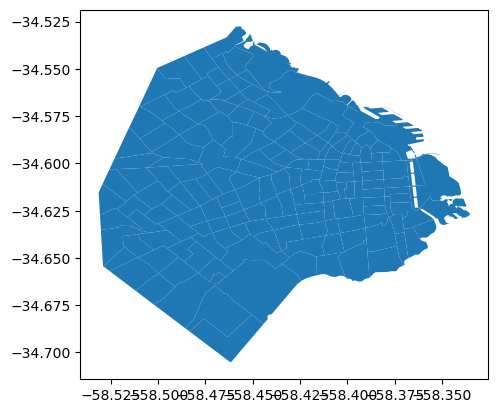

In [16]:
#Con los circuitos electorales
circuitos.plot()

<Axes: >

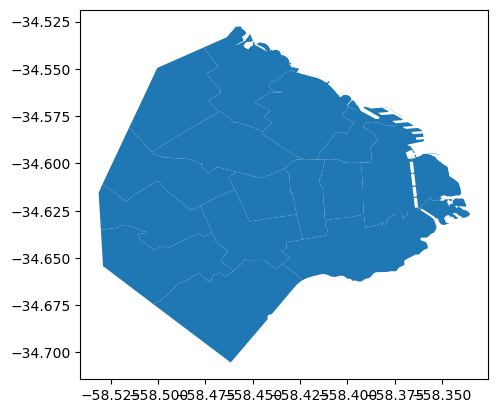

In [17]:
#Con las comunas ya agrupadas
comunas_geometry.plot()

In [18]:
comunas_geometry.columns

Index(['COMUNA', 'geometry', 'WKT', 'ID', 'CIRCUITO_N', 'BARRIO', 'TOTAL',
       'MASCULINO', 'FEMENINO', 'PERIMETRO', 'AREA'],
      dtype='object')

In [19]:
comunas_geometry.dtypes

COMUNA          object
geometry      geometry
WKT             object
ID              object
CIRCUITO_N      object
BARRIO          object
TOTAL           object
MASCULINO       object
FEMENINO        object
PERIMETRO       object
AREA            object
dtype: object

In [20]:
# Agrega "Comuna" a cada valor en la columna 'Comuna'
comunas_geometry['COMUNA'] = 'Comuna ' + comunas_geometry['COMUNA'].astype(str).str.zfill(2)

comunas_geometry


,COMUNA,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,Comuna 10,"POLYGON ((-58.49486 -34.64467, -58.49496 -34.6...",MULTIPOLYGON (((-58.5216367948036 -34.62441597...,102103104105106107108109110112111,102103104105106107108109110112111,VERSALLESVILLA REALMONTE CASTROMONTE CASTROVIL...,12488.0000000000012898.0000000000011788.000000...,6159.000000000006409.000000000005696.000000000...,6329.000000000006489.000000000006092.000000000...,5650.121649130005071.212098420004716.075631930...,1407277.519140000001334764.207840000001049457....
2,Comuna 11,"POLYGON ((-58.51695 -34.62022, -58.52102 -34.6...",MULTIPOLYGON (((-58.4779866630383 -34.62248007...,113114115116117118119120121122123,113114115116117118119120121122123,VILLA SANTA RITAVILLA SANTA RITAVILLA GRAL. MI...,12152.0000000000014866.0000000000012357.000000...,5845.000000000006945.000000000005962.000000000...,6307.000000000007921.000000000006395.000000000...,4542.725803940004542.767422630004206.813366860...,1070609.722589999901083337.84002000000915447.1...
3,Comuna 12,"POLYGON ((-58.50978 -34.58697, -58.51458 -34.5...",MULTIPOLYGON (((-58.5097844637826 -34.58697438...,124125126127128129130131132133,124125126127128129130131132133,VILLA PUEYRREDONVILLA PUEYRREDONVILLA URQUIZAV...,16048.0000000000018747.0000000000016660.000000...,7607.000000000008955.000000000008131.000000000...,8441.000000000009792.000000000008529.000000000...,5428.702768580005165.189274250004895.745469120...,1737552.540749999901565359.827940000001391969....
4,Comuna 13,"POLYGON ((-58.46735 -34.57251, -58.46809 -34.5...",MULTIPOLYGON (((-58.4552509221862 -34.53385674...,134135136137138139140141142143144145146147,134135136137138139140141142143144145146147,NUÃ‘EZNUÃ‘EZNUÃ‘EZNUÃ‘EZBELGRANOBELGRANOBELGRA...,8389.000000000009792.0000000000014638.00000000...,4120.000000000004779.000000000006797.000000000...,4269.000000000005013.000000000007841.000000000...,6144.477221950005049.314978940004018.350728930...,1595513.613990000001435842.99343000000703315.3...
5,Comuna 14,"POLYGON ((-58.41600 -34.59786, -58.41895 -34.5...",MULTIPOLYGON (((-58.4425340254759 -34.56369026...,148149150151152153154155156157,148149150151152153154155156157,PALERMOPALERMOPALERMOPALERMOPALERMOPALERMOPALE...,21337.0000000000022672.0000000000013165.000000...,9753.0000000000010290.000000000006154.00000000...,11584.0000000000012382.000000000007011.0000000...,4826.2285797100016029.272596100008196.66982808...,1008574.947870000005331336.478360000102687803....
6,Comuna 15,"POLYGON ((-58.44013 -34.60584, -58.44526 -34.6...",MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158159160161162163164165166167,158159160161162163164165166167,VILLA CRESPOVILLA CRESPOVILLA CRESPOVILLA CRES...,19488.0000000000012238.0000000000023031.000000...,9140.000000000005857.0000000000010872.00000000...,10348.000000000006381.0000000000012159.0000000...,3878.318564570003384.287658960005113.706125690...,742959.55238200002690945.495524000031034522.12...
7,Comuna 02,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,Comuna 03,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MU

In [21]:
comunas_geometry

,COMUNA,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,Comuna 10,"POLYGON ((-58.49486 -34.64467, -58.49496 -34.6...",MULTIPOLYGON (((-58.5216367948036 -34.62441597...,102103104105106107108109110112111,102103104105106107108109110112111,VERSALLESVILLA REALMONTE CASTROMONTE CASTROVIL...,12488.0000000000012898.0000000000011788.000000...,6159.000000000006409.000000000005696.000000000...,6329.000000000006489.000000000006092.000000000...,5650.121649130005071.212098420004716.075631930...,1407277.519140000001334764.207840000001049457....
2,Comuna 11,"POLYGON ((-58.51695 -34.62022, -58.52102 -34.6...",MULTIPOLYGON (((-58.4779866630383 -34.62248007...,113114115116117118119120121122123,113114115116117118119120121122123,VILLA SANTA RITAVILLA SANTA RITAVILLA GRAL. MI...,12152.0000000000014866.0000000000012357.000000...,5845.000000000006945.000000000005962.000000000...,6307.000000000007921.000000000006395.000000000...,4542.725803940004542.767422630004206.813366860...,1070609.722589999901083337.84002000000915447.1...
3,Comuna 12,"POLYGON ((-58.50978 -34.58697, -58.51458 -34.5...",MULTIPOLYGON (((-58.5097844637826 -34.58697438...,124125126127128129130131132133,124125126127128129130131132133,VILLA PUEYRREDONVILLA PUEYRREDONVILLA URQUIZAV...,16048.0000000000018747.0000000000016660.000000...,7607.000000000008955.000000000008131.000000000...,8441.000000000009792.000000000008529.000000000...,5428.702768580005165.189274250004895.745469120...,1737552.540749999901565359.827940000001391969....
4,Comuna 13,"POLYGON ((-58.46735 -34.57251, -58.46809 -34.5...",MULTIPOLYGON (((-58.4552509221862 -34.53385674...,134135136137138139140141142143144145146147,134135136137138139140141142143144145146147,NUÃ‘EZNUÃ‘EZNUÃ‘EZNUÃ‘EZBELGRANOBELGRANOBELGRA...,8389.000000000009792.0000000000014638.00000000...,4120.000000000004779.000000000006797.000000000...,4269.000000000005013.000000000007841.000000000...,6144.477221950005049.314978940004018.350728930...,1595513.613990000001435842.99343000000703315.3...
5,Comuna 14,"POLYGON ((-58.41600 -34.59786, -58.41895 -34.5...",MULTIPOLYGON (((-58.4425340254759 -34.56369026...,148149150151152153154155156157,148149150151152153154155156157,PALERMOPALERMOPALERMOPALERMOPALERMOPALERMOPALE...,21337.0000000000022672.0000000000013165.000000...,9753.0000000000010290.000000000006154.00000000...,11584.0000000000012382.000000000007011.0000000...,4826.2285797100016029.272596100008196.66982808...,1008574.947870000005331336.478360000102687803....
6,Comuna 15,"POLYGON ((-58.44013 -34.60584, -58.44526 -34.6...",MULTIPOLYGON (((-58.4233636058363 -34.59775318...,158159160161162163164165166167,158159160161162163164165166167,VILLA CRESPOVILLA CRESPOVILLA CRESPOVILLA CRES...,19488.0000000000012238.0000000000023031.000000...,9140.000000000005857.0000000000010872.00000000...,10348.000000000006381.0000000000012159.0000000...,3878.318564570003384.287658960005113.706125690...,742959.55238200002690945.495524000031034522.12...
7,Comuna 02,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,Comuna 03,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MU

In [22]:
#Renombramos la columna COMUNA a seccion nombre asi matchea cuando hagamos la fusion de los df
comunas_geometry = comunas_geometry.rename(columns={'COMUNA': 'seccion_nombre'})


In [23]:
#Ordenamos las comunas
comunas_geometry = comunas_geometry.sort_values(by="seccion_nombre")
comunas_geometry

,seccion_nombre,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
7,Comuna 02,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
8,Comuna 03,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035036037038039040041042,30313233343536373839404142,BALVANERABALVANERABALVANERABALVANERABALVANERAB...,11737.0000000000014387.0000000000013128.000000...,5594.000000000006840.000000000006447.000000000...,6143.000000000007547.000000000006681.000000000...,2435.449887850002667.628718430002937.035241570...,372621.67427900003415581.46001400001433560.755...
9,Comuna 04,"POLYGON ((-58.38834 -34.66040, -58.38857 -34.6...",MULTIPOLYGON (((-58.3911717039239 -34.62725581...,043044045046047048049050051052053054055056057,434445464748495051525354555657,PARQUE PATRICIOSPARQUE PATRICIOSPARQUE PATRICI...,12645.000000000009017.000000000006626.00000000...,6221.000000000004308.000000000003338.000000000...,6424.000000000004709.000000000003288.000000000...,4240.118534610003034.380189830004035.948039670...,1048153.78007000000536442.185014000051041288.6...
10,Comuna 05,"POLYGON ((-58.41098 -34.63425, -58.41089 -34.6...",MULTIPOLYGON (((-58.4117786133578 -34.63035933...,058059060061062063064065066067,58596061626364656667,BOEDOBOEDOBOEDOALMAGROALMAGROALMAGROALMAGROALM...,13294.0000000000012152.0000000000014712.000000...,6609.000000000005906.000000000007016.000000000...,6685.000000000006246.000000000007696.000000000...,4205.282189820003853.156874380003839.806826920...,1051550.19280999990831900.92881700001724382.04...
11,Comuna 06,"POLYGON ((-58.45258 -34.62854, -58.45394 -34.6...",MULTIPOLYGON (((-58.4401348899609 -34.60583718...,068069070071072073074,68697071727374,CABALLITOCABALLITOCABALLITOCABALLITOCABALLITOC...,19160.0000000000028315.0000000000024308.000000...,8771.0000000000012610.0000000000011102.0000000...,10389.0000000000015705.0000000000013206.000000...,3960.783459640004370.533284610004288.632264930...,973593.82335500000958089.287436999961012942.90...
12,Comuna 07,"POLYGON ((-58.46507 -34.64473, -58.46511 -34.6...",MULTIPOLYGON (((-58.4388523166959 -34.63524254...,075076077078079080081082083084085086,757677787980818283848586,PARQUE CHACABUCOPARQUE CHACABUCOPARQUE CHACABU...,9742.0000000000014937.0000000000012762.0000000...,4565.000000000006978.000000000006325.000000000...,5177.000000000007959.000000000006437.000000000...,3862.812401330004141.240233580004934.942342140...,861842.52480400004923261.266608000031191250.85...
13,Comuna 08,"POLYGON ((-58.46081 -34.70436, -58.46093 -34.7...",MULTIPOLYGON (((-58.4500836139203 -34.65116549...,087088089090,87888990,VILLA SOLDATIVILLA RIACHUELOVILLA LUGANOVILLA ...,28726.0000000000015703.0000000000046140.000000...,14869.000000000008274.0000000000023699.0000000...,13857.000000000007429.0000000000022441.0000000...,12542.9950616000010602.8675450000010058.062239...,8660350.143179999704224142.280089999504524565....
14,Comuna 09,"MULTIPOLYGON (((-58.49193 -34.66618, -58.49216...",MULTIPOLYGON (((-58.4704405728115 -34.66427726...,091092093094095096097098099100

In [24]:
#Traemos el codigo trabajado en la otra parte
comunas = [f"Comuna {i:02d}" for i in range(1, 16)]
df_filtrado = resultados[(resultados["cargo_nombre"] == "PRESIDENTE Y VICE") & (resultados["seccion_nombre"].isin(comunas))]
df_agrupado = df_filtrado.groupby("seccion_nombre")["votos_cantidad"].sum().reset_index()
df_agrupado_partidos = df_filtrado.groupby(["seccion_nombre", "agrupacion_nombre"])["votos_cantidad"].sum().reset_index()
idx_partidos = df_agrupado_partidos.groupby("seccion_nombre")["votos_cantidad"].idxmax()
partidos_con_mas_votos = df_agrupado_partidos.loc[idx_partidos]
partidos_con_mas_votos.reset_index()

,index,seccion_nombre,agrupacion_nombre,votos_cantidad
0,2,Comuna 01,JUNTOS POR EL CAMBIO,45975
1,7,Comuna 02,JUNTOS POR EL CAMBIO,57022
2,12,Comuna 03,JUNTOS POR EL CAMBIO,39075
3,19,Comuna 04,UNION POR LA PATRIA,51401
4,22,Comuna 05,JUNTOS POR EL CAMBIO,43259
5,27,Comuna 06,JUNTOS POR EL CAMBIO,54873
6,32,Comuna 07,JUNTOS POR EL CAMBIO,48420
7,39,Comuna 08,UNION POR LA PATRIA,43136
8,44,Comuna 09,UNION POR LA PATRIA,39233
9,47,Comuna 10,JUNTOS POR EL CAMBIO,41986


In [25]:
#Toca mergear los dataframe de resultados y el mapa agrupado por comunas
df_mergeado = pd.merge(partidos_con_mas_votos, comunas_geometry, on='seccion_nombre', how='inner')

In [26]:
df_mergeado


,seccion_nombre,agrupacion_nombre,votos_cantidad,geometry,WKT,ID,CIRCUITO_N,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,Comuna 01,JUNTOS POR EL CAMBIO,45975,"POLYGON ((-58.37862 -34.63049, -58.37952 -34.6...",MULTIPOLYGON (((-58.3661871461469 -34.62043128...,0010020030040050060070080090100110120130140150...,12345678910111213141516171819,SAN TELMOSAN TELMOPUERTO MADEROPUERTO MADERORE...,11377.0000000000011365.00000000000702.00000000...,5695.000000000005870.00000000000416.0000000000...,5682.000000000005495.00000000000286.0000000000...,4157.175562830003045.8587348900014439.58562320...,709721.55022900004523430.860013999984248032.90...
1,Comuna 02,JUNTOS POR EL CAMBIO,57022,"POLYGON ((-58.40371 -34.59846, -58.40375 -34.5...",MULTIPOLYGON (((-58.4000903015341 -34.56941452...,020021022023024025026027028029,20212223242526272829,RECOLETARECOLETARECOLETARECOLETARECOLETARECOLE...,7501.0000000000014997.0000000000017433.0000000...,3429.000000000006614.000000000007550.000000000...,4072.000000000008383.000000000009883.000000000...,15655.553257800003384.373650930002626.15301860...,2449809.67344000000636595.66411000001380920.13...
2,Comuna 03,JUNTOS POR EL CAMBIO,39075,"POLYGON ((-58.41178 -34.63035, -58.41185 -34.6...",MULTIPOLYGON (((-58.4125763504496 -34.60160088...,030031032033034035036037038039040041042,30313233343536373839404142,BALVANERABALVANERABALVANERABALVANERABALVANERAB...,11737.0000000000014387.0000000000013128.000000...,5594.000000000006840.000000000006447.000000000...,6143.000000000007547.000000000006681.000000000...,2435.449887850002667.628718430002937.035241570...,372621.67427900003415581.46001400001433560.755...
3,Comuna 04,UNION POR LA PATRIA,51401,"POLYGON ((-58.38834 -34.66040, -58.38857 -34.6...",MULTIPOLYGON (((-58.3911717039239 -34.62725581...,043044045046047048049050051052053054055056057,434445464748495051525354555657,PARQUE PATRICIOSPARQUE PATRICIOSPARQUE PATRICI...,12645.000000000009017.000000000006626.00000000...,6221.000000000004308.000000000003338.000000000...,6424.000000000004709.000000000003288.000000000...,4240.118534610003034.380189830004035.948039670...,1048153.78007000000536442.185014000051041288.6...
4,Comuna 05,JUNTOS POR EL CAMBIO,43259,"POLYGON ((-58.41098 -34.63425, -58.41089 -34.6...",MULTIPOLYGON (((-58.4117786133578 -34.63035933...,058059060061062063064065066067,58596061626364656667,BOEDOBOEDOBOEDOALMAGROALMAGROALMAGROALMAGROALM...,13294.0000000000012152.0000000000014712.000000...,6609.000000000005906.000000000007016.000000000...,6685.000000000006246.000000000007696.000000000...,4205.282189820003853.156874380003839.806826920...,1051550.19280999990831900.92881700001724382.04...
5,Comuna 06,JUNTOS POR EL CAMBIO,54873,"POLYGON ((-58.45258 -34.62854, -58.45394 -34.6...",MULTIPOLYGON (((-58.4401348899609 -34.60583718...,068069070071072073074,68697071727374,CABALLITOCABALLITOCABALLITOCABALLITOCABALLITOC...,19160.0000000000028315.0000000000024308.000000...,8771.0000000000012610.0000000000011102.0000000...,10389.0000000000015705.0000000000013206.000000...,3960.783459640004370.533284610004288.632264930...,973593.82335500000958089.287436999961012942.90...
6,Comuna 07,JUNTOS POR EL CAMBIO,48420,"POLYGON ((-58.46507 -34.64473, -58.46511 -34.6...",MULTIPOLYGON (((-58.4388523166959 -34.63524254...,075076077078079080081082083084085086,757677787980818283848586,PARQUE CHACABUCOPARQUE CHACABUCOPARQUE CHACABU...,9742.0000000000014937.0000000000012762.0000000...,4565.000000000006978.000000000006325.000000000...,5177.000000000007959.000000000006437.000000000...,3862.812401330004141.240233580004934.942342140...,861842.52480400004923261.266608000031191250.85...
7,Comuna 08,UNION POR LA PATRIA,43136,"POLYGON ((-58.46081 -34.70436, -58.46093 -34.7...",MULTIPOLYGON (((-58.4500836139203 -34.65116549...,087088089090,87888990,VILLA SOLDATIVILLA RIACHUELOVILLA LUGANOVILLA ...,28726.0000000000015703.0000000000046140.000000...,14869.000000000008274.0000000000023699.0000000...,13857.000000000007429.0000000000022441.0000000...,12

In [27]:
df_mergeado.shape

(15, 13)

In [28]:
df_mergeado.columns

Index(['seccion_nombre', 'agrupacion_nombre', 'votos_cantidad', 'geometry',
       'WKT', 'ID', 'CIRCUITO_N', 'BARRIO', 'TOTAL', 'MASCULINO', 'FEMENINO',
       'PERIMETRO', 'AREA'],
      dtype='object')

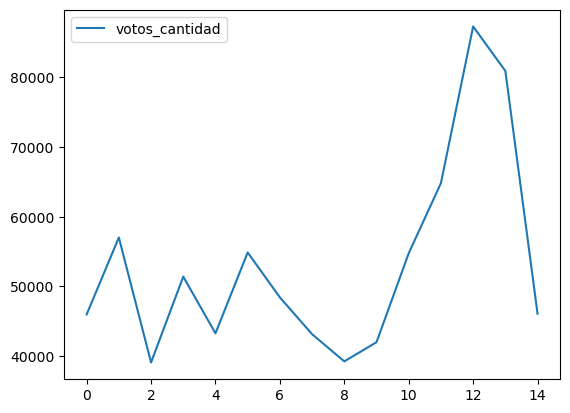

In [29]:
df_mergeado.plot()
plt.show()

In [30]:
# Creamos un geo a partir del df mergeado
gdf = gpd.GeoDataFrame(df_mergeado, geometry='geometry')


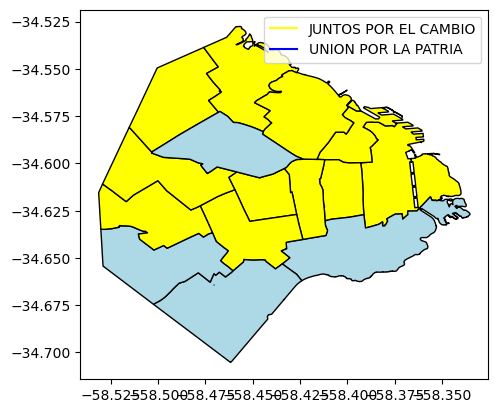

In [31]:
colores = {'JUNTOS POR EL CAMBIO': 'yellow', 'UNION POR LA PATRIA': 'lightblue'}

gdf['color'] = gdf['agrupacion_nombre'].map(colores)


ax = gdf.plot(color=gdf['color'], edgecolor='black', legend=True, legend_kwds={'loc': 'upper right'})


ax.plot([], [], color='yellow', label='JUNTOS POR EL CAMBIO')
ax.plot([], [], color='blue', label='UNION POR LA PATRIA')

ax.legend()

plt.show()

